# Lecture 1

- - -
author: Sam Lau   
editor: Kevin Shuey      
title: Lecture 1  
date: 2023-06-14     
ref: ucb_Data100    
- - -

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
import pandas as pd

students = pd.read_csv('lec01-names.csv')
students.head()

,Name,Status
0,Aaron,Enrolled
1,Adriana,Enrolled
2,Akihiro,Enrolled
3,Allen,Enrolled
4,Andrei,Enrolled


In [3]:
students['Name'] = students['Name'].str.lower()
students.head()

,Name,Status
0,aaron,Enrolled
1,adriana,Enrolled
2,akihiro,Enrolled
3,allen,Enrolled
4,andrei,Enrolled


In [4]:
len(students)

138

In [5]:
print(f"There are {len(students)} students on the roster.")

There are 138 students on the roster.


In [6]:
students['Status'].value_counts().to_frame()

,count
Status,
Enrolled,132
Waitlist,6


/var/folders/h3/kst79dg57g18qj470505fpq40000gn/T/ipykernel_28913/506576337.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(students['Name'].str.len(),


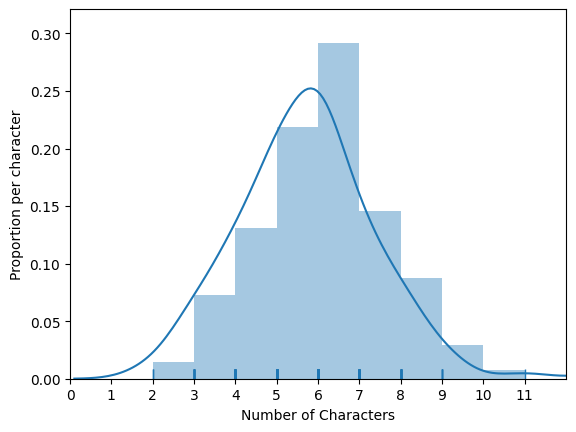

In [7]:
sns.distplot(students['Name'].str.len(),
             rug=True,
             bins=np.arange(12),
             axlabel="Number of Characters")
plt.xlim(0, 12)
plt.xticks(np.arange(12))
plt.ylabel('Proportion per character');

## Case I: What's in a Name?

In [8]:
students['Name'][5]

'andrew'

In [9]:
babynames = pd.read_csv('babynames.csv')
babynames

,Name,Sex,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


Inference:

https://www.ssa.gov/oact/babynames/background.html

> All names are from Social Security card applications for births that occurred in the United States after 1879. Note  that many people born before 1937 never applied for a Social Security card, so their names are not included in our data. For others who did apply, our records may not show the place of birth, and again their names are not included in our data.  
> All data are from a 100% sample of our records on Social Security card applications as of March 2019.

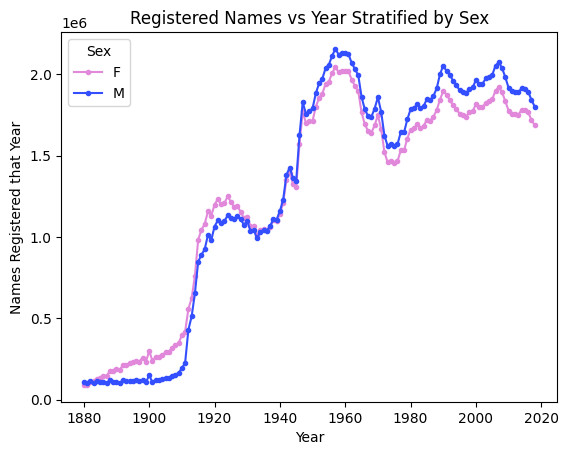

In [10]:
pivot_year_name_count = pd.pivot_table(
    babynames, index='Year', columns='Sex',
    values='Count', aggfunc=np.sum)

pink_blue = ["#E188DB", "#334FFF"]
with sns.color_palette(sns.color_palette(pink_blue)):
    pivot_year_name_count.plot(marker=".")
    plt.title("Registered Names vs Year Stratified by Sex")
    plt.ylabel('Names Registered that Year')

In [11]:
babynames['Name'] = babynames['Name'].str.lower()
babynames

,Name,Sex,Count,Year
0,mary,F,7065,1880
1,anna,F,2604,1880
2,emma,F,2003,1880
3,elizabeth,F,1939,1880
4,minnie,F,1746,1880
...,...,...,...,...
1957041,zylas,M,5,2018
1957042,zyran,M,5,2018
1957043,zyrie,M,5,2018
1957044,zyron,M,5,2018


In [12]:
sex_counts = pd.pivot_table(babynames, index='Name', columns='Sex', values='Count',
                            aggfunc='sum', fill_value=0., margins=True)
sex_counts

Sex,F,M,All
Name,,,
aaban,0,114,114
aabha,35,0,35
aabid,0,16,16
aabidah,5,0,5
aabir,0,10,10
...,...,...,...
zyvon,0,7,7
zyyanna,6,0,6
zyyon,0,6,6


In [13]:
prop_female = sex_counts['F'] / sex_counts['All']
sex_counts['prop_female'] = prop_female
sex_counts

Sex,F,M,All,prop_female
Name,,,,
aaban,0,114,114,0.000000
aabha,35,0,35,1.000000
aabid,0,16,16,0.000000
aabidah,5,0,5,1.000000
aabir,0,10,10,0.000000
...,...,...,...,...
zyvon,0,7,7,0.000000
zyyanna,6,0,6,1.000000
zyyon,0,6,6,0.000000


In [14]:
def sex_from_name(name):
    if name in sex_counts.index:
        prop = sex_counts.loc[name, 'prop_female']
        return 'F' if prop > 0.5 else 'M'
    else:
        return 'Name not in dataset'

sex_from_name('sam')

'M'

In [15]:
interact(sex_from_name, name='sam');

interactive(children=(Text(value='sam', description='name'), Output()), _dom_classes=('widget-interact',))

In [16]:
students['sex'] = students['Name'].apply(sex_from_name)
students.head()

,Name,Status,sex
0,aaron,Enrolled,M
1,adriana,Enrolled,F
2,akihiro,Enrolled,M
3,allen,Enrolled,M
4,andrei,Enrolled,M


In [17]:
students['sex'].value_counts().to_frame().sort_index()

,count
sex,
F,33
M,63
Name not in dataset,42


In [18]:
def avg_year(group):
    return np.average(group['Year'], weights=group['Count'])

avg_years = (
    babynames
    .groupby('Name')
    .apply(avg_year)
    .rename('avg_year')
    .to_frame()
)
avg_years

,avg_year
Name,
aaban,2013.333333
aabha,2013.714286
aabid,2012.687500
aabidah,2018.000000
aabir,2017.000000
...,...
zyvion,2009.000000
zyvon,2015.000000
zyyanna,2010.000000


In [19]:
def year_from_name(name):
    return (avg_years.loc[name, 'avg_year']
            if name in avg_years.index
            else None)

# Generate input box for you to try some names out:
interact(year_from_name, name='fernando');

interactive(children=(Text(value='fernando', description='name'), Output()), _dom_classes=('widget-interact',)…

In [20]:
students['year'] = students['Name'].apply(year_from_name)
students.head()

,Name,Status,sex,year
0,aaron,Enrolled,M,1987.346098
1,adriana,Enrolled,F,1996.919577
2,akihiro,Enrolled,M,1998.000000
3,allen,Enrolled,M,1957.914942
4,andrei,Enrolled,M,1998.134380


/var/folders/h3/kst79dg57g18qj470505fpq40000gn/T/ipykernel_28913/937818804.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(students['year'].dropna(), bins=15);


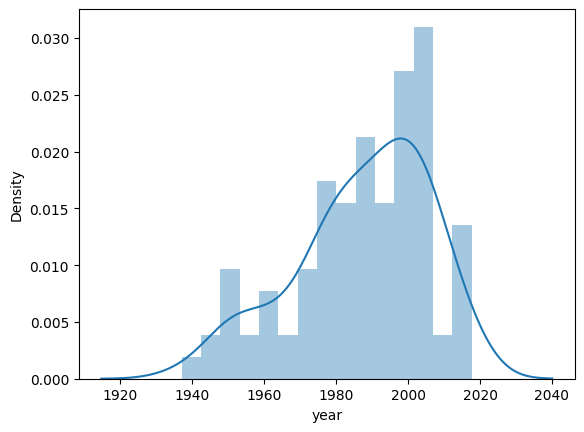

In [21]:
sns.distplot(students['year'].dropna(), bins=15);

In [22]:
students['year'].mean()

1987.5036920376106

## Case II: Inaccurate age estimate

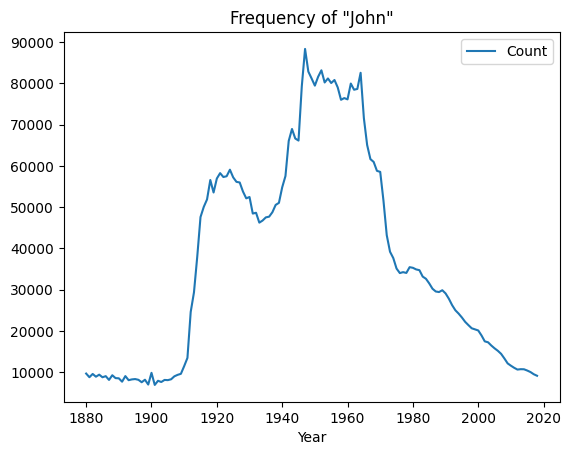

In [23]:
names = babynames.set_index('Name').sort_values('Year')
john = names.loc['john']
john[john['Sex'] == 'M'].plot('Year', 'Count')
plt.title('Frequency of "John"')

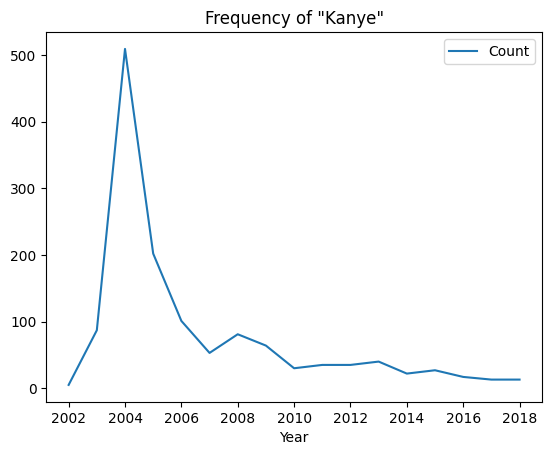

In [24]:
names = babynames.set_index('Name').sort_values('Year')
kanye = names.loc['kanye']
kanye[kanye['Sex'] == 'M'].plot('Year', 'Count')
plt.title('Frequency of "Kanye"');

## Case III: Hey Siri

In [25]:
def plot_name(name, xlim=None, xline=None):
    names.loc[name].groupby('Year').sum().plot()
    plt.title(f'Frequency of "{name}"')
    if xlim: plt.xlim(xlim)
    if xline: plt.axvline(xline, c='red')

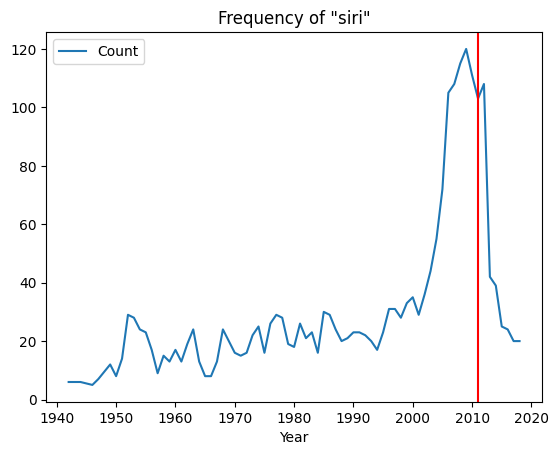

In [26]:
plot_name('siri', xline=2011)

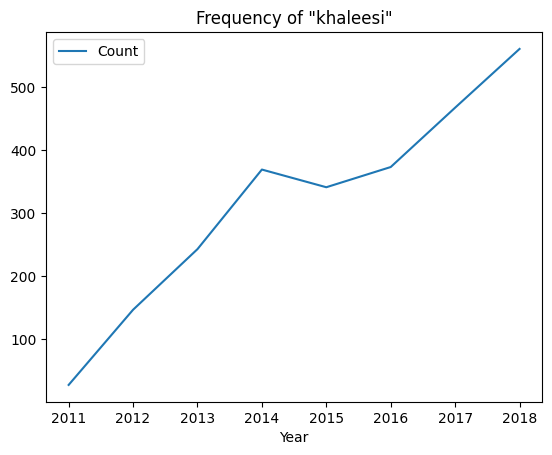

In [27]:
plot_name('khaleesi')